#**Aula 08: Introdução ao Web Scrapping**

Web Scrapping trata-se da prática de coletar dados automaticamente de meios que não sejam através de API's, por meio de uma aplicação capaz de consultar um servidor web, solicitar dados, analisar e extrair informações necessárias.

Muitas vezes, bases dados públicos não estão disponível para serem consumidas, porém os dados estão disponíveis por meio de acesso à páginas Web.

Devemos sempre lembrar que com a LGPD, a coleta de dados tem que ser sempre pensada com muito cuidado, pois nem todo dado que está público pode ser consumido e utilizado.

A biblioteca Beatifoul Soup é muito usada para web scrapping(existindo em java também) mas existem outras como Selenium e Scrapy que tem funcionalidades parecidas,
cada uma com suas vantagens e desvantagens, mas todas tendo um funcionamento parecido.

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

Nesse projeto, vamos pegar os dados da tabela de uma página sobre as linguagens de programação mais usadas no mundo

Faço a requisição e coloco os dados em uma variável:

In [ ]:
html=requests.get('https://www.statisticstimes.com/tech/top-computer-languages.php').content #especifico o link do site, e especifico se quero receber
#em string(.text) ou em dados puros em bytes(.content)

soup=BeautifulSoup(html,'html5lib') #Aqui, passo o parseador de HTML, e específico o tipo do html(html5)

Quando usamos o BeautifoulSoup, precisamos entender como o HTML e suas tags funcionam, então é de bom senso estudar um pouco de HTML para melhorar o web scrapping.
No HTML, a tag 'p' se refere a parágrafo. Iremos buscar essa tag usando o BeautifoulSoup

In [ ]:
primeiro_paragrafo=soup.find('p')
primeiro_paragrafo

<p>Python is the top programming language in the TIOBE and PYPL Index. Python has taken a lead of over 15% from C
in TIOBE. In PYPL, the gap is much wider, as top-ranked Python is ahead by over 15% from 2nd-ranked Java.</p>

In [ ]:
primeiro_paragrafo.text #mostro só o texto dentro da tag 'p'

'Python is the top programming language in the TIOBE and PYPL Index. Python has taken a lead of over 15% from C\nin TIOBE. In PYPL, the gap is much wider, as top-ranked Python is ahead by over 15% from 2nd-ranked Java.'

Agora, para buscar TODAS as tags, usamos o método find_all. O BeautifoulSoup vai criar uma lista com cada um dos parágrafos encontrados:

In [ ]:
todos_paragrafos=soup.find_all('p')
todos_paragrafos


[<p>Python is the top programming language in the TIOBE and PYPL Index. Python has taken a lead of over 15% from C
 in TIOBE. In PYPL, the gap is much wider, as top-ranked Python is ahead by over 15% from 2nd-ranked Java.</p>,
 <p><b>TIOBE:</b> Python, C, C++, Java, and C# are way ahead of others in the TIOBE Index. C, C++, and Java
 are very close to each other at the 2nd, 3rd, and 4th numbers. C++ and C# have had positive trends in the past five years. 
 These three have had negative trends in the past five years: Java, C, and PHP. PHP hit its lowest position (17th) ever in 
 the TIOBE index in April 2024. PHP was in 3rd position in Mar 2010 and is now in 14th.
 C hits its lowest 4th position in Mar 2025. The rating of Java has declined from 26.49% in June 2001 to 7.87% in Jan 2024.</p>,
 <p><b>PYPL:</b> According  to PYPL, which publishes separate rankings for five countries, Python is the top language in 
 all five countries (US, India, Germany, United Kingdom, and France). Python 

In [ ]:
todos_paragrafos[0] #Acessando paragrafo por índice

<p>Python is the top programming language in the TIOBE and PYPL Index. Python has taken a lead of over 15% from C
in TIOBE. In PYPL, the gap is much wider, as top-ranked Python is ahead by over 15% from 2nd-ranked Java.</p>

Para acessar os links, a tag HTML se dá como 'a':

In [ ]:
todos_links=soup.find_all('a')
todos_links

[<a href="/index.php">
 <img alt="statisticstimes" height="90" src="/statistics.png" width="200"/>
 </a>,
 <a href="/index.php">World</a>,
 <a href="/india.php">India</a>,
 <a href="/economy/world-statistics.php">World</a>,
 <a href="/economy/country-statistics.php">Country</a>,
 <a href="/economy/india-statistics.php">India</a>,
 <a href="/demographics/world-statistics.php">World</a>,
 <a href="/demographics/country-statistics.php">Country</a>,
 <a href="/demographics/india-statistics.php">India</a>,
 <a href="/politics/india-statistics.php">India</a>,
 <a href="/geography/world-statistics.php">World</a>,
 <a href="/geography/india-statistics.php">India</a>,
 <a href="/tech/world-statistics.php">Tech</a>,
 <a href="/sports/world-statistics.php">World</a>,
 <a href="/sports/india-statistics.php">India</a>,
 <a href="/ranking/world-statistics.php">Ranking</a>,
 <a href="/article/world-statistics.php">World</a>,
 <a href="/article/india-statistics.php">India</a>,
 <a href="https://www.ti

Novamente, para realizar web scrapping, precisamos entender um pouco de HTML, e para pegarmos informações da página HTML, precisamos INSPECIONAR ela dentro do nosso navegador, e descobrir as tags onde estão os dados, se elas tem algum id para ajudar, etc

Agora vamos inspecionar a tabela, para pegar os dados da tabela "PYPL Index"

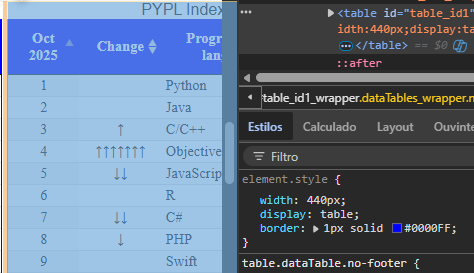

In [ ]:
tabela=soup.find('table',{'id':'table_id1'}).find('tbody') #a tag table tem o atributo id='table_id1', e nesse caso, os dados da tablea estão DENTRO
#da tag tbody
tabela

<tbody>
<tr><td class="data1">1</td><td class="data1"></td><td class="name">Python</td><td class="data1"> 28.97 %</td><td class="data1">-0.5 %</td></tr>
<tr><td class="data1">2</td><td class="data1"></td><td class="name">Java</td><td class="data1"> 13.94 %</td><td class="data1">-1.5 %</td></tr>
<tr><td class="data1">3</td><td class="data1">↑</td><td class="name">C/C++</td><td class="data1"> 10.54 %</td><td class="data1">+3.6 %</td></tr>
<tr><td class="data1">4</td><td class="data1">↑↑↑↑↑↑↑</td><td class="name">Objective-C</td><td class="data1"> 7.05 %</td><td class="data1">+4.5 %</td></tr>
<tr><td class="data1">5</td><td class="data1">↓↓</td><td class="name">JavaScript</td><td class="data1"> 6.33 %</td><td class="data1">-1.7 %</td></tr>
<tr><td class="data1">6</td><td class="data1"></td><td class="name">R</td><td class="data1"> 5.27 %</td><td class="data1">+0.6 %</td></tr>
<tr><td class="data1">7</td><td class="data1">↓↓</td><td class="name">C#</td><td class="data1"> 3.96 %</td><td cla

Agora vou criar uma lista com cada uma das linhas da minha tabela, e em cada uma das linhas da minha tabela, vou procurar os dados ('td') e vou printar apenas a primeira, a terceira e a quarta tag 'td' da linha, pois uma tem informalções desnecessárias(como observamos nos dados printados acima):

In [ ]:
linhas=tabela.find_all('tr') #procuro tag 'tr'
for linha in linhas:
  dado=linha.find_all('td') #procuro tag 'td'
  print(dado[0].text)
  print(dado[2].text)
  print(dado[3].text)
  print("----------")

1
Python
 28.97 %
----------
2
Java
 13.94 %
----------
3
C/C++
 10.54 %
----------
4
Objective-C
 7.05 %
----------
5
JavaScript
 6.33 %
----------
6
R
 5.27 %
----------
7
C#
 3.96 %
----------
8
PHP
 3.19 %
----------
9
Swift
 2.93 %
----------
10
Rust
 2.59 %
----------
11
Ada
 2.25 %
----------
12
TypeScript
 2.11 %
----------
13
Matlab
 1.42 %
----------
14
Go
 1.24 %
----------
15
Kotlin
 1.19 %
----------
16
Powershell
 1.05 %
----------
17
Ruby
 0.96 %
----------
18
VBA
 0.92 %
----------
19
Lua
 0.92 %
----------
20
Dart
 0.88 %
----------
21
Abap
 0.5 %
----------
22
Julia
 0.46 %
----------
23
Scala
 0.38 %
----------
24
Visual Basic
 0.26 %
----------
25
Zig
 0.19 %
----------
26
Delphi/Pascal
 0.14 %
----------
27
Cobol
 0.12 %
----------
28
Groovy
 0.11 %
----------
29
Perl
 0.09 %
----------
30
Haskell
 0.06 %
----------


Posso colocar essas informações(linguagem e porcentagem) em uma lista, para depois compor um dataframe:

In [ ]:
linguagem=[] #Crio os dois arrays que vão ser usados para inserir os dados
pontos=[]
for linha in linhas:
  dado=linha.find_all('td') #encontro todos os 'td'(tags onde estão os dados)
  linguagem.append(dado[2].text) #com o método .append, a cada repetição inserimos no final da lista os dados que estão na segunda e terceira tag da linha
  pontos.append(dado[3].text)

In [ ]:
print(linguagem) #duas listas criadas
pontos

['Python', 'Java', 'C/C++', 'Objective-C', 'JavaScript', 'R', 'C#', 'PHP', 'Swift', 'Rust', 'Ada', 'TypeScript', 'Matlab', 'Go', 'Kotlin', 'Powershell', 'Ruby', 'VBA', 'Lua', 'Dart', 'Abap', 'Julia', 'Scala', 'Visual Basic', 'Zig', 'Delphi/Pascal', 'Cobol', 'Groovy', 'Perl', 'Haskell']


[' 28.97 %',
 ' 13.94 %',
 ' 10.54 %',
 ' 7.05 %',
 ' 6.33 %',
 ' 5.27 %',
 ' 3.96 %',
 ' 3.19 %',
 ' 2.93 %',
 ' 2.59 %',
 ' 2.25 %',
 ' 2.11 %',
 ' 1.42 %',
 ' 1.24 %',
 ' 1.19 %',
 ' 1.05 %',
 ' 0.96 %',
 ' 0.92 %',
 ' 0.92 %',
 ' 0.88 %',
 ' 0.5 %',
 ' 0.46 %',
 ' 0.38 %',
 ' 0.26 %',
 ' 0.19 %',
 ' 0.14 %',
 ' 0.12 %',
 ' 0.11 %',
 ' 0.09 %',
 ' 0.06 %']

In [ ]:
dados=pd.DataFrame(linguagem, columns=['Linguagem']) #criamos a primeira coluna do df

In [ ]:
dados['Pontos']=pontos #Segunda coluna

In [ ]:
dados

,Linguagem,Pontos
0,Python,28.97 %
1,Java,13.94 %
2,C/C++,10.54 %
3,Objective-C,7.05 %
4,JavaScript,6.33 %
5,R,5.27 %
6,C#,3.96 %
7,PHP,3.19 %
8,Swift,2.93 %
9,Rust,2.59 %


O scrapping pode ser trabalhoso e muitas vezes a melhor saída é buscar dados em planilhas, bancos de dados, etc, porém, porém é muito bom para quando precisamos descobrir dados que só estão disponíveis na web.

Muitos projetos tem dados da web como ponto de partida, e o trabalho de inspecionar páginas, ver tags e buscar informações, de fato se assemelha ao processo de mineração.